In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.utils import Bunch
import tensorflow as tf

In [2]:
np.set_printoptions(precision=4, threshold=15)

## Dataset

In [3]:
(X_train, y_train), (X_test, y_test)= tf.keras.datasets.boston_housing.load_data()
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (404, 13)
X_test shape :  (102, 13)
y_train shape :  (404,)
y_test shape :  (102,)


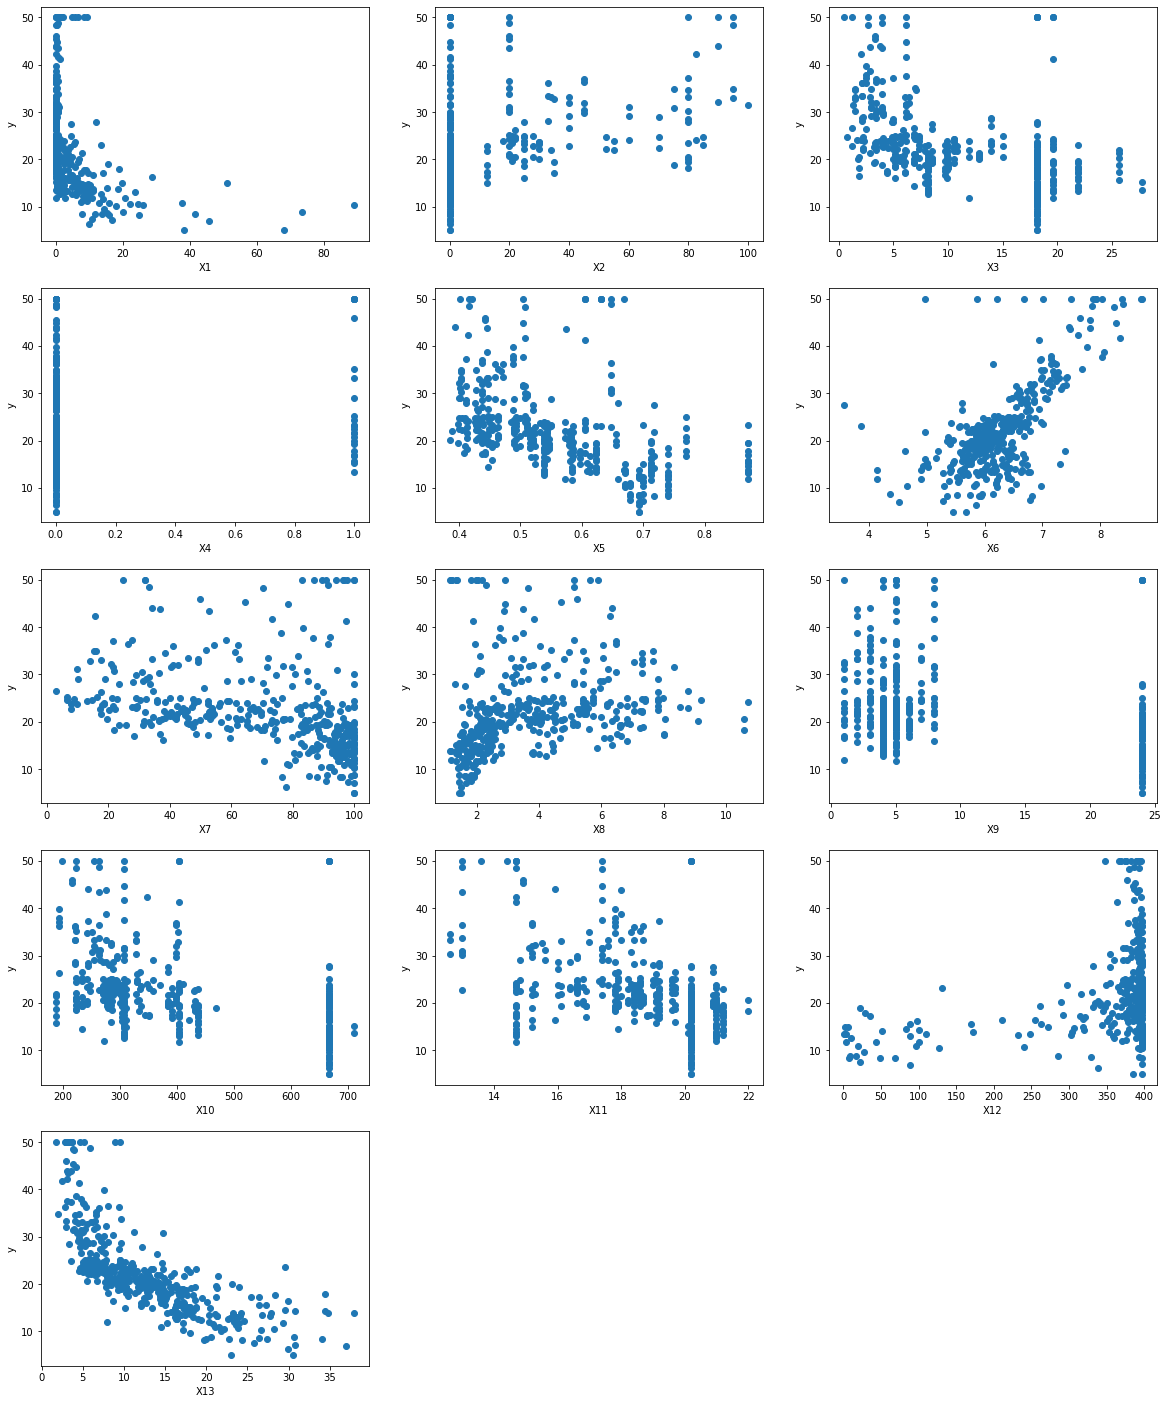

In [4]:
plt.figure(figsize=(20, 25))
for i in range(13):
    plt.subplot(5, 3, i + 1)
    plt.scatter(X_train[:, i], y_train)
    plt.xlabel(f'X{i + 1}')
    plt.ylabel('y')

Drop features

In [5]:
features = [0, 2, 4, 5, 6, 7, 10, 11, 12]
X_train = X_train[:, features]
X_test = X_test[:, features]
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (404, 9)
X_test shape :  (102, 9)
y_train shape :  (404,)
y_test shape :  (102,)


## Normal Equation Regression 

In [6]:
class NormalEquationRegressor:
    def __init__(self):
        self.weights = None 
    
    def __transform(self, X):
        return np.c_[np.ones(X.shape[0]), X]
      
    def fit(self, X, y):
        X = self.__transform(X)
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ y.reshape(-1, 1)
        
    def predict(self, X):
        return self.weights.T @ self.__transform(X).T
    
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        J = 0.5 * np.mean(np.square(y - y_pred))
        return {'loss' : J}
    
    def get_weights(self):
        """returns weights as a dict object with keys - `weights` and `bias`"""
        model_weights = {'weights' : self.weights[1:], 'bias' : self.weights[0]}
        return model_weights 

In [7]:
model = NormalEquationRegressor()

In [10]:
model.fit(X_train, y_train)

In [11]:
model.get_weights()

{'weights': array([[-6.0773e-02],
        [-2.2810e-02],
        [-1.6509e+01],
        [ 4.0306e+00],
        [-5.2639e-03],
        [-1.4539e+00],
        [-9.3148e-01],
        [ 7.2487e-03],
        [-5.3771e-01]]),
 'bias': array([34.1074])}

In [12]:
model.evaluate(X_train, y_train)

{'loss': 12.511054566194892}

In [13]:
indices = np.random.randint(0, X_train.shape[0], 100)
y_pred = model.predict(X_train[indices, :]).reshape(-1)
y_true = y_train[indices]

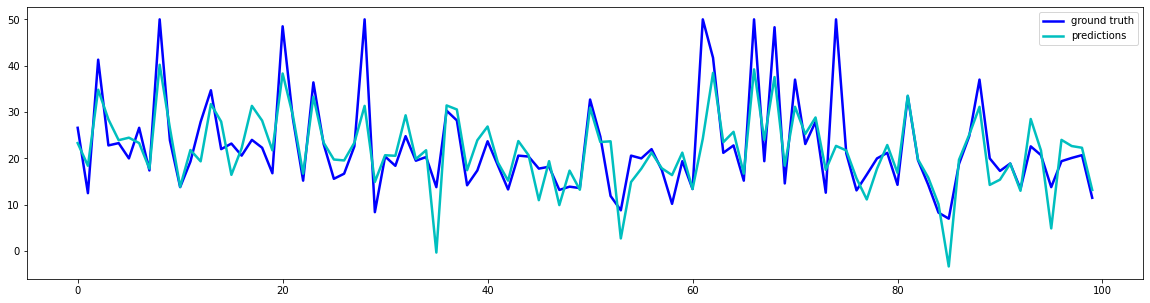

In [14]:
plt.figure(figsize=(20,5))
plt.plot(y_true, 'b', lw=2.5, label='ground truth')
plt.plot(y_pred, 'c', lw=2.5, label='predictions')
plt.legend(loc='best')

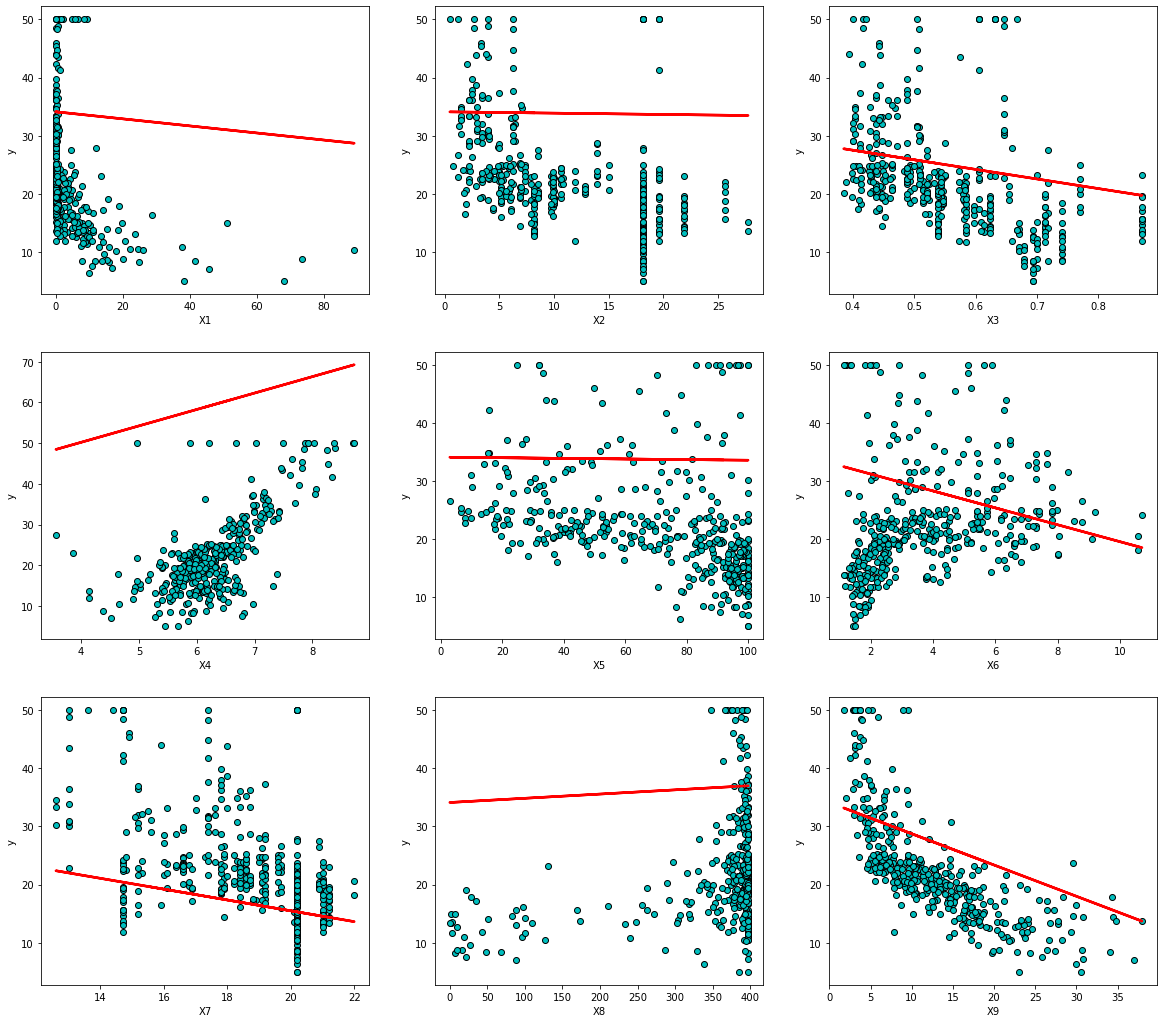

In [23]:
weights, bias = model.get_weights().values()
plt.figure(figsize=(20, 18))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.scatter(X_train[:, i], y_train, c='c', ec='k')
    y_pred = weights[i] * X_train[:, i] + bias
    plt.plot(X_train[:, i], y_pred, c='r', lw=2.5)
    plt.xlabel(f'X{i + 1}')
    plt.ylabel('y')

## Evaluation

In [28]:
model.evaluate(X_test, y_test)

{'loss': 10.088849938983852}

In [24]:
y_pred = model.predict(X_test).reshape(-1)

In [25]:
test_loss = 0.5 * np.mean((y_pred - y_test) ** 2)
print('test loss : ', test_loss)

test loss :  10.088849938983852


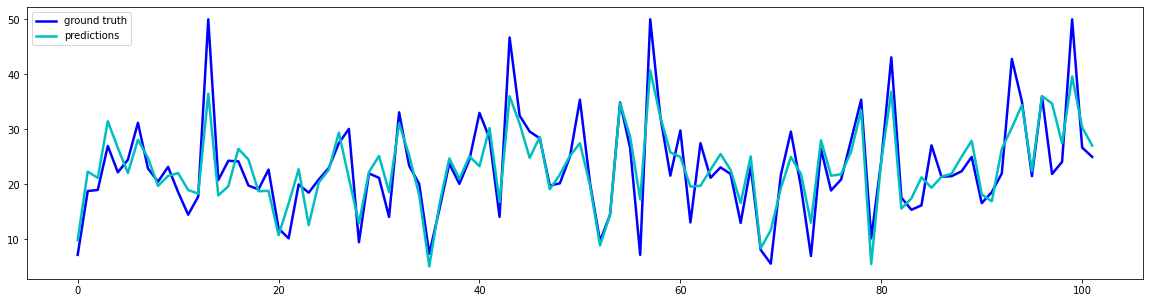

In [26]:
plt.figure(figsize=(20,5))
plt.plot(y_test, 'b', lw=2.5, label='ground truth')
plt.plot(y_pred, 'c', lw=2.5, label='predictions')
plt.legend(loc='best')

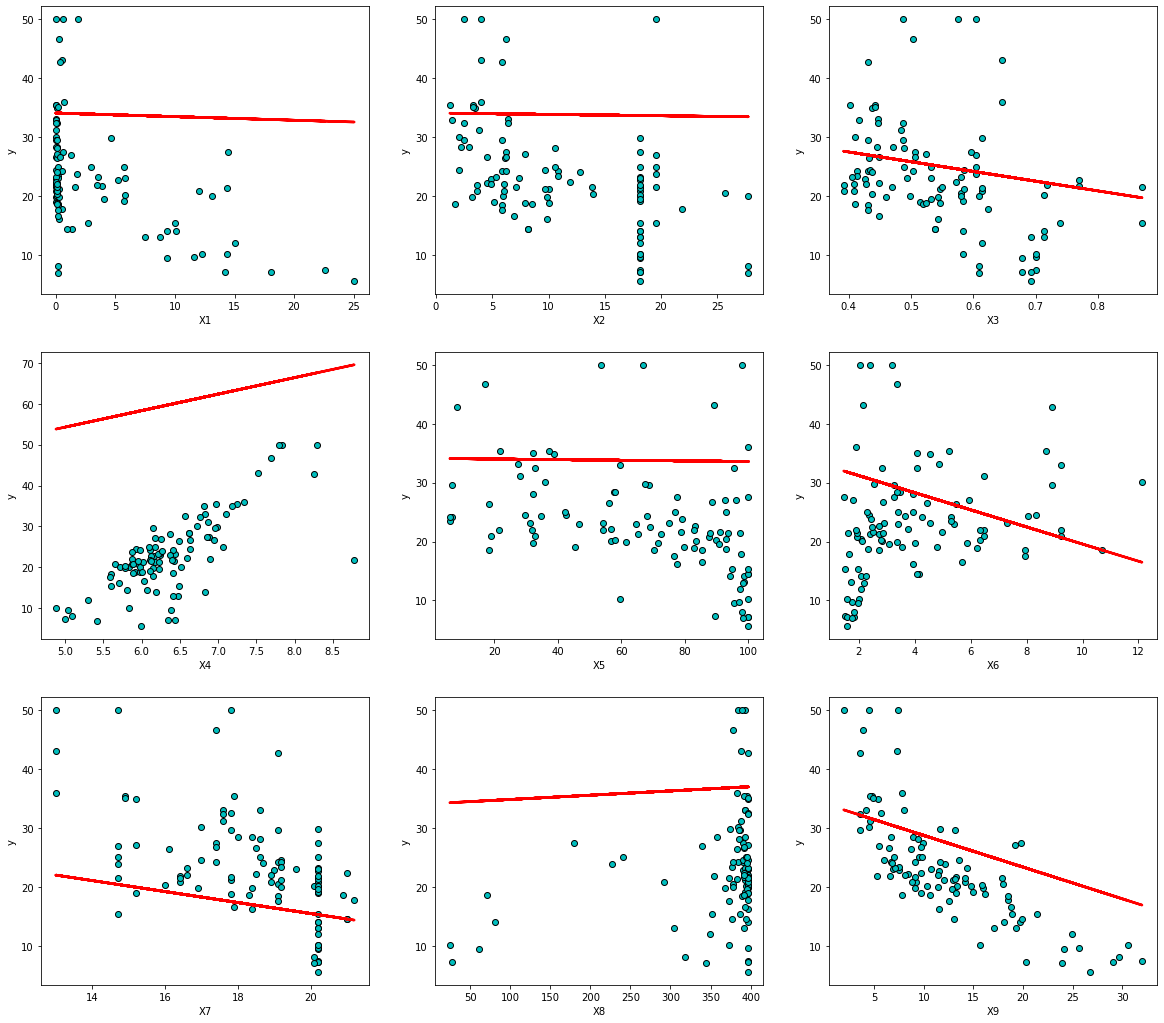

In [27]:
weights, bias = model.get_weights().values()
plt.figure(figsize=(20, 18))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.scatter(X_test[:, i], y_test, c='c', ec='k')
    y_pred = weights[i] * X_test[:, i] + bias
    plt.plot(X_test[:, i], y_pred, c='r', lw=2.5)
    plt.xlabel(f'X{i + 1}')
    plt.ylabel('y')